<a href="https://colab.research.google.com/github/jtneumann/DL-Basketball/blob/master/BB_LP2_wk1_trial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version)
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import random

3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


In [3]:
#Create Model

def Build_Model():
    model = keras.models.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=[4]),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
    ])

    o = keras.optimizers.RMSprop()
    m = [
           keras.metrics.MeanAbsoluteError(),
           keras.metrics.Accuracy(),
           keras.metrics.MeanSquaredError()
    ]

    L = keras.losses.MeanSquaredError()

    model.compile(loss=L, optimizer=o, metrics=m)
    return model

NN_Model = Build_Model()



In [5]:
import io
from google.colab import files
uploaded = files.upload()


Saving Games-Calculated.csv to Games-Calculated.csv


In [6]:
column_names = ['Date','HomeTeam','HomeScore','AwayTeam','AwayScore',
                'HomeScoreAverage','HomeDefenseAverage','AwayScoreAverage','AwayDefenseAverage',
                'Result']

game_data = pd.read_csv((io.BytesIO(uploaded['Games-Calculated.csv'])), header=None, names=column_names)

In [7]:
# Drop the columns that we are NOT going to train on
game_data.drop(['Date','HomeTeam','HomeScore','AwayTeam','AwayScore'], axis=1, inplace=True)
game_data.tail()

,HomeScoreAverage,HomeDefenseAverage,AwayScoreAverage,AwayDefenseAverage,Result
20155,80.058824,63.529412,67.777778,70.666667,2
20156,85.062500,74.562500,71.466667,75.200000,10
20157,71.437500,65.500000,67.388889,72.666667,-8
20158,80.666667,72.333333,70.200000,70.066667,7
20159,83.238095,72.761905,75.428571,78.214286,12


In [8]:
game_data.head()


,HomeScoreAverage,HomeDefenseAverage,AwayScoreAverage,AwayDefenseAverage,Result
0,87.0,76.0,76.0,87.0,11
1,70.0,50.0,50.0,70.0,20
2,70.0,57.0,57.0,70.0,13
3,89.0,83.0,83.0,89.0,6
4,68.0,62.0,62.0,68.0,6


In [11]:
#Train/Test Spit
training_set = game_data.sample(frac=0.8, random_state=0)
test_set = game_data.drop(training_set.index)
print('training_set_size: %s' % training_set.shape[0])
print('test_set_size: %s' % test_set.shape[0])

training_set_size: 16128
test_set_size: 4032


In [12]:
training_set.head()


,HomeScoreAverage,HomeDefenseAverage,AwayScoreAverage,AwayDefenseAverage,Result
5951,81.800000,64.400000,68.800000,81.000000,5
15481,64.333333,68.000000,74.500000,81.500000,6
16660,92.714286,70.714286,72.000000,71.800000,5
4896,74.095238,66.047619,62.384615,84.076923,17
12061,82.363636,66.090909,67.600000,75.400000,-2


In [13]:
#Labels
training_labels = training_set.pop('Result')
test_labels = test_set.pop('Result')

In [14]:
training_set.head()

,HomeScoreAverage,HomeDefenseAverage,AwayScoreAverage,AwayDefenseAverage
5951,81.800000,64.400000,68.800000,81.000000
15481,64.333333,68.000000,74.500000,81.500000
16660,92.714286,70.714286,72.000000,71.800000
4896,74.095238,66.047619,62.384615,84.076923
12061,82.363636,66.090909,67.600000,75.400000


In [15]:
#Normalize Data
mean = training_set.mean(axis=0)
train_data = training_set - mean
std = train_data.std(axis=0)
train_data /= std

test_data = test_set - mean
test_data /= std

In [16]:
#history = NN_Model.fit(train_data, training_labels, epochs=1000, validation_split=0.2, verbose=0)

history = NN_Model.fit(x=train_data, y=training_labels, batch_size=128, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
101/101 [==============================] - 4s 5ms/step - loss: 226.4597 - mean_absolute_error: 11.9403 - accuracy: 0.0000e+00 - mean_squared_error: 226.4597 - val_loss: 192.6568 - val_mean_absolute_error: 11.0923 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 192.6568
Epoch 2/100
101/101 [==============================] - 0s 3ms/step - loss: 183.0289 - mean_absolute_error: 10.7011 - accuracy: 0.0000e+00 - mean_squared_error: 183.0289 - val_loss: 144.1678 - val_mean_absolute_error: 9.5196 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 144.1678
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 135.2916 - mean_absolute_error: 9.0593 - accuracy: 0.0000e+00 - mean_squared_error: 135.2916 - val_loss: 111.1982 - val_mean_absolute_error: 8.2171 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 111.1982
Epoch 4/100
101/101 [==============================] - 0s 3ms/step - loss: 110.8276 - mean_absolute_error: 8.2351 - accuracy: 0.0000e+00 - mea

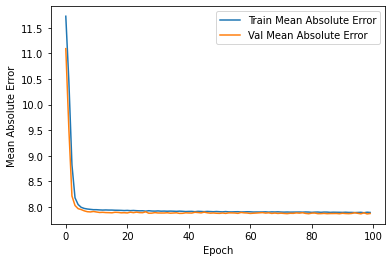

In [18]:
# Check the results
# Create a DataFrame from the output from the fit method
hist = pd.DataFrame(history.history)
# Create an epoch column and set it to the epoch index
hist['epoch'] = history.epoch

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history['epoch'], history['mean_absolute_error'],
           label='Train Mean Absolute Error')
  plt.plot(history['epoch'], history['val_mean_absolute_error'],
           label = 'Val Mean Absolute Error')
  plt.legend()
  #plt.ylim([0,1])
  plt.show()

plot_history(hist)

In [19]:
history = NN_Model.fit(x=train_data, y=training_labels, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
101/101 [==============================] - 0s 4ms/step - loss: 102.5040 - mean_absolute_error: 7.8936 - accuracy: 0.0000e+00 - mean_squared_error: 102.5040 - val_loss: 102.3043 - val_mean_absolute_error: 7.8756 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 102.3043
Epoch 2/10
101/101 [==============================] - 0s 3ms/step - loss: 102.5068 - mean_absolute_error: 7.8942 - accuracy: 0.0000e+00 - mean_squared_error: 102.5068 - val_loss: 102.3160 - val_mean_absolute_error: 7.8778 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 102.3160
Epoch 3/10
101/101 [==============================] - 0s 3ms/step - loss: 102.5090 - mean_absolute_error: 7.8939 - accuracy: 0.0000e+00 - mean_squared_error: 102.5090 - val_loss: 102.3463 - val_mean_absolute_error: 7.8702 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 102.3463
Epoch 4/10
101/101 [==============================] - 0s 3ms/step - loss: 102.4943 - mean_absolute_error: 7.8924 - accuracy: 0.0000e+00 - mean_squar

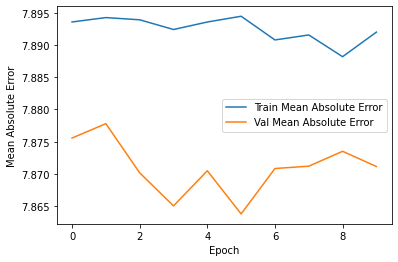

In [20]:
# Check the results
# Create a DataFrame from the output from the fit method
hist = pd.DataFrame(history.history)
# Create an epoch column and set it to the epoch index
hist['epoch'] = history.epoch

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history['epoch'], history['mean_absolute_error'],
           label='Train Mean Absolute Error')
  plt.plot(history['epoch'], history['val_mean_absolute_error'],
           label = 'Val Mean Absolute Error')
  plt.legend()
  #plt.ylim([0,1])
  plt.show()

plot_history(hist)